# Introduction

In analyzing the happiness dataset, we were trying to understand the relationship between economic, social, and personal factors and the overall score each country received. From KMeans clustering, finding $R^2$, and the mean squared error, we were able to find that GDP per capita, healthy life expectancy, and social support were the three factors that showed the strongest linear relationship to each country’s happiness score.    

We specifically looked at three research questions to learn more about the relationships between each factor and the happiness score for each country. 

Research question:
1. What trends can we see for countries that are ranked higher than 10 in terms of other independent variables in the data?
2. Are there any relationships between the independent variable and the happiness score?
3. If so, how well can we predict actual values using the relationship we found for the second research question? 

Summary of main findings:
- KMeans algorithm shows that countries with higher GDP per capita have higher scores for social support and healthy life expectancy.
- GDP per capita, healthy life expectancy, social support are the factors that have the strongest linear relationship with a country’s happiness score with $R^2$ values of 0.6237, 0.5518, and 0.4241, respectively.
- We found that a multiple linear regression model with GDP per capita, healthy life expectancy, and social support does not predict the happiness score accurately by plotting the residuals where we can see the deviations in predicted and actual values. However, the logistic regression model with the three independent variables can predict whether a country is ranked higher than 10 with 94.47% accuracy.
- We concluded from the hypothesis tests that at least one predictor of the multiple linear regression explains a significant variation in the happiness score

# Data Description

**1. Introductions**

**What are the observations (rows) and the attributes (columns)?**

The data includes 157 observations that are identified as countries in the world. The columns of the 2015, 2016, 2017 dataset are Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual. These observations are taken from the year 2015, 2016, 2017 dataset as the data from 2018 and 2019 have less columns. 

**1.1 Motivation**

**Why was this dataset created?**

The dataset was created to assess the well-being of citizens throughout different countries and see the correlation with the progress of the nation. Though this started as a celebration of International Day of Happiness, the report gained traction through the years (2012-present) and has become a reference for world leaders in the economics, public health, and policy area of their country. It helps assess what direction these countries are going toward, and its progress in overall well-being/policies.

**Who funded the creation of the dataset?**

The world happiness data is published by the Sustainable Development Solutions Network at United Nations, and the data is primarily provided by Gallup World Poll.

**2.1 Collection Process**

**What processes might have influenced what data was observed and recorded and what was not?**

The world happiness data was created to make a ranking of national happiness for all countries. However, the data from each year does not necessarily have the same countries. Such variation may be due to situations such as war that makes surveying impossible to conduct. Other reasons may be government regulations, or citizens are unwilling to answer surveys, or not having enough samples to calculate a score.

**2.2 Preprocessing/Cleaning**

**What preprocessing was done, and how did the data come to be in the form that you are using? If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

The dataset was taken from the GallupWorld Poll, whose happiness scores were inspired by the United Nations. The World Happiness Report released by the United Nations ranks 155 countries, which influenced the production of this dataset. Happiness reports have gained more recognition from the public as more government officials and different organizations use these observations to make decisions in economics, psychology, politics, and more. The initial process to determine the data was to define what happiness is. The attributes of happiness scores and rankings from this dataset were recorded using data from the Gallup World Poll, which are derived from answers to a life evaluation question known as the Cantril ladder. People were asked this Cantril ladder question in a poll they took willingly--though it is unclear if they knew what their polling results would be used. They were asked to rate their lives on a scale from 0 to 10, where 10 is the best possible life for them. Factors that may influence one’s well-being might have been determined to know what data to observe and record to measure happiness. The data observes mainly six factors - economic production, social support, life expectancy, freedom, absence of corruption, and generosity. Gallup weights were applied to the data that came from the Gallup World Poll. They then compared data to a “benchmark” imaginary country (“Dystopia”)) that had the lowest scores for the 6 significant factors of happiness. All of the real country’s data were used to compare against Dystopia for a consistent way of measuring the factors of happiness.

The data for 2015, 2016, 2017, 2018, and 2019 had different rows and columns. The first preprocessing was to match all the columns of the data from each year. Since 2019 was the most recent one, we transformed the 2019 data to match the column names and order of the 2019 data. Then we combined all data into one large dataset. This preprocessing allowed us to conduct more accurate regression analysis as there is a larger amount of data. The second preprocessing was to match the list of countries with the 2019 data. While scanning through the happiness score data, we realized that each year, different numbers of countries were included. Therefore, we created another dataset that deleted countries which were not in all datasets.


**Jupyter notebook for data cleansing can be found at https://github.com/tt0507/info2950_final_project/blob/master/data.ipynb**

## Original Data Source

https://www.kaggle.com/unsdsn/world-happiness#2019.csv

**Potential Problems with Dataset**

The dataset looks at various countries and their happiness in different years.
Attribues (columns) are slightly different in different year databases. For example, some differences include: the order of columns may be different, certain column names are slightly changed, or some year databases are missing some attributes. 

# Data Analysis

We start by importing the necessary libraries to further analyze our cleaned/organized dataset from above: concat_data.csv. This dataset includes all the data from all 5 years, with shared happiness score factors.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')

In [2]:
all_years = pd.read_csv('concat_data.csv')
all_years = all_years.drop([489]) # drop because Perceptions of corruption column is NaN
all_years.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,above_10
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,1
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,1
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1


To find the trends that are apparent within the countries that are ranked higher than 10, we used KMeans clustering algorithm.

In [0]:
# K-means
from sklearn.cluster import KMeans

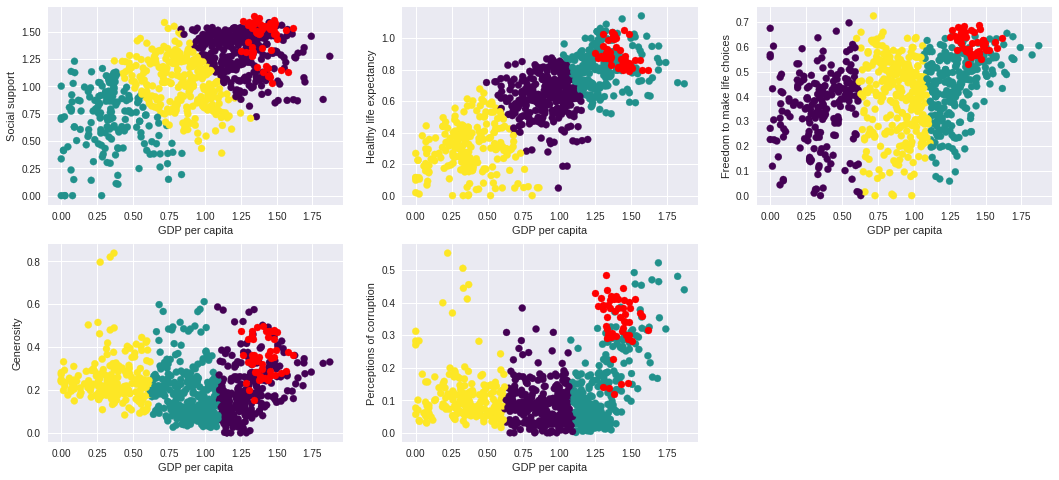

In [4]:
cols = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', \
       'Perceptions of corruption']

plt.figure(figsize = (18, 8))
for column in cols:
    index = cols.index(column)
    plt.subplot(2, 3, index + 1)
    
    # get countries that are ranked below 10
    X = all_years[['GDP per capita', column]][all_years['above_10'] == 0]
    kmeans = KMeans(n_clusters=3).fit(X)
    predict = kmeans.predict(X)

    # get countries that are above 10
    above_10 = all_years[['GDP per capita', column]][all_years['above_10'] == 1]

    # plot both data together
    plt.scatter(X['GDP per capita'], X[column], c = predict, cmap='viridis')
    plt.scatter(above_10['GDP per capita'], above_10[column], c = 'red')
    plt.ylabel(column)
    plt.xlabel('GDP per capita')
plt.show()

For the scatter plot above, the points with the Viridis color map represent countries that are ranked less than 10, and the red dots show countries ranked higher than 10.

From the scatter plot, we can see that countries with higher GDP per capita tend to have higher scores for social support, healthy life expectancy. The reason may be because countries with higher incomes can afford to purchase more goods and pay medical fees.

However, the scatter plot for freedom to make life choices, generosity, and perception of corruption does not necessarily show the same trend as the first two. We can see that despite the difference in GDP per capita, the range of the freedom score is the same with all clusters. Such a trend shows that many countries assure their citizen's freedom regardless of the income they make. We can see similar trends for the generosity and corruption plot as well. The range of scores for generosity and corruption is roughly the same regardless of the clusters.

The KMeans algorithm shows insight into potential relationships between the happiness score and the factors that determine it. To analyze further the relationship between the independent variable and the happiness score, we calculated the mean and standard deviation for each of the factors to understand our data in depth.

In [5]:
for x in range(6):
    mean = round(all_years[all_years.columns[x+3]].mean(), 4)
    std = round(all_years[all_years.columns[x+3]].std(), 4)
    print('Mean of {}: {}'.format(all_years.columns[x+3], mean))
    print('Standard Deviation of {}: {}'.format(all_years.columns[x+3], std))
    print('\n')

Mean of GDP per capita: 0.9145
Standard Deviation of GDP per capita: 0.4054


Mean of Social support: 1.0788
Standard Deviation of Social support: 0.3296


Mean of Healthy life expectancy: 0.6123
Standard Deviation of Healthy life expectancy: 0.2485


Mean of Freedom to make life choices: 0.4113
Standard Deviation of Freedom to make life choices: 0.1529


Mean of Generosity: 0.2186
Standard Deviation of Generosity: 0.1224


Mean of Perceptions of corruption: 0.1254
Standard Deviation of Perceptions of corruption: 0.1058




From the output above, large standard deviations such as GDP per capita and social support can possibly hint that these variables will be suited for regression analysis because they are spread out more.

Below, we have plotted histograms for each factor for the happiness score to better show how data for each category is distributed. 

Histograms for each Factor: Frequency and Distribution of Data


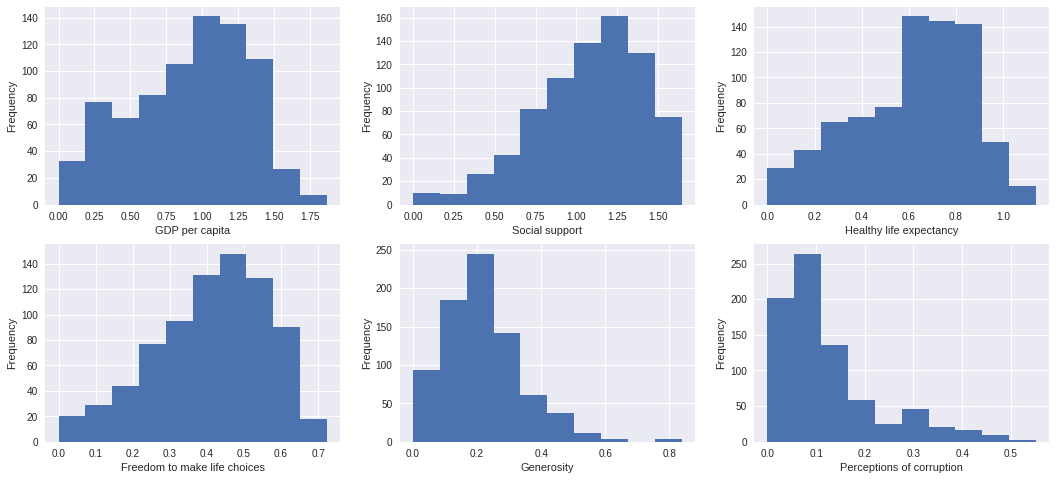

In [6]:
cols = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', \
       'Perceptions of corruption']
print("Histograms for each Factor: Frequency and Distribution of Data")

plt.figure(figsize = (18, 8))
for num in range(len(cols)):
    plt.subplot(2, 3, num+1)
    plt.hist(all_years[cols[num]])
    plt.ylabel('Frequency')
    plt.xlabel(cols[num])
plt.show()

In [7]:
all_years[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910


Here, we analyze the independent variable of the data set: 'GDP per capita,' 'Social support,' 'Healthy life expectancy,' 'Freedom to make life choices,' 'Generosity,' and 'Perceptions of corruption.' From the output above, we notice that the variable that has the highest mean is 'Social Support' with its value 1.0787, and the lowest variable to be 'Perception of Corruption' with 0.1254. From histograms, we can see that the relationship between each of 'GDP per capita,' 'Social support,' 'Healthy life expectancy,' 'Freedom to make life choices' is negatively skewed, and 'Generosity,' and 'Perceptions of corruption' to be positively skewed. 

We noticed that the variable 'Generosity' being positively skewed is unusual because we would expect it to be negatively skewed. Although we do not know if generosity applies to the government or the citizens, we would expect those countries that show generosity lead to citizens' having a higher happiness score; therefore, being negatively skewed.

These last two factors are skewed so that we can also think of the possibility of them representing the geometric distribution. 

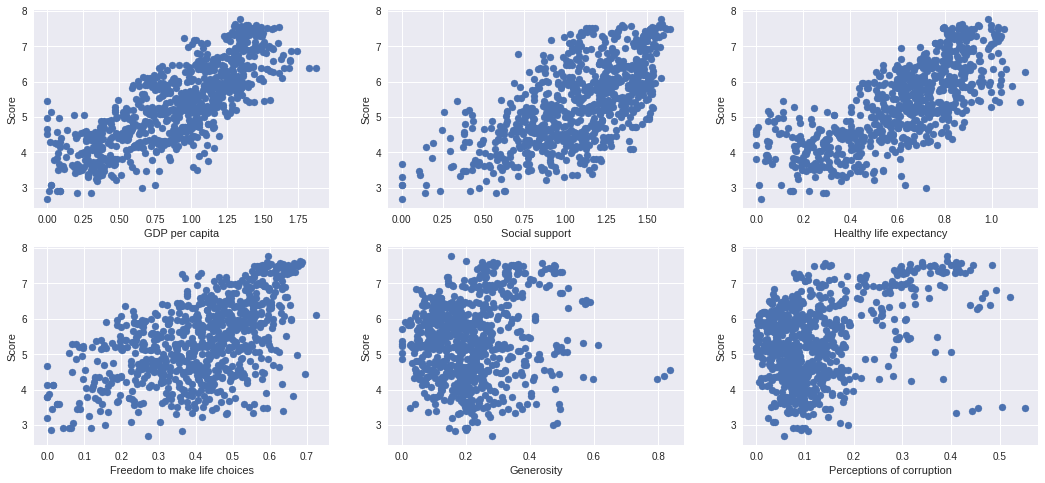

In [8]:
cols = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', \
       'Perceptions of corruption']

plt.figure(figsize = (18, 8))

for num in range(len(cols)):
    plt.subplot(2, 3, num+1)
    plt.scatter(all_years[cols[num]], all_years['Score'])
    plt.ylabel('Score')
    plt.xlabel(cols[num])
    
plt.show()

Above, are the scatter plots for each happiness factor and each country's corresponding happiness score. As you can see, GDP per capita (GDP), Social support (SS), and healthy life expectancy (H) show a strong linear relationship with the happiness score. We see no relationship between the two variables from the scatter plot for the happiness score against generosity and perception of corruption. For the plot of freedom to make life choices, we see a mild linear relationship.

After plotting and seeing this relationship, we further analyzed each factor by calculating its $R^2$ (coefficient of determination), slope, and mean squared error to figure which factors are significant in determines the happiness score.

In [9]:
# get R^2
for var in cols:
    lin_reg = LinearRegression().fit(all_years[[var]], all_years['Score'])
    print("R-squared for {}: {}".format(var, round(lin_reg.score(all_years[[var]], all_years['Score']), 4))) 

R-squared for GDP per capita: 0.6237
R-squared for Social support: 0.4241
R-squared for Healthy life expectancy: 0.5518
R-squared for Freedom to make life choices: 0.3062
R-squared for Generosity: 0.0191
R-squared for Perceptions of corruption: 0.1587


In [10]:
# get slope and intercept
y=all_years['Score']
cols1 = ["Social support", "GDP per capita", "Healthy life expectancy"]
for one in cols1:
    x=all_years[[one]]
    model = LinearRegression().fit(x, y)
    print("{outcome} has slope {slope:.3f} and intercept {intercept:.3f}".format(outcome = one,slope = model.coef_[0],intercept = model.intercept_))

Social support has slope 2.227 and intercept 2.975
GDP per capita has slope 2.196 and intercept 3.369
Healthy life expectancy has slope 3.370 and intercept 3.314


The $R^2$ values explain the proportion of the variability of the dependent variable that can be explained by the independent variable. The $R^2$ for GDP per capita (GDP), Health life expectancy(H), and Social Support(SS) had the most significant values (in comparison to the other variables) as predicted from the scatter plot. The $R^2$ values suggest that GDP per capita, healthy life expectancy, and social support are the best predictors.

The positive slope values we calculated for GDP, H, and SS further validated that the three independent variables showed a stronger linear relationship with the overall happiness score. 

We then calculated the Mean Square Error for all of the factors. 

In [11]:
# get MSE
from sklearn.metrics import mean_squared_error
print("Mean Squared Errors for all Factors: ")

print("")
for var in cols:
    lin_reg = LinearRegression().fit(all_years[[var]], all_years['Score'])
    mse = mean_squared_error(all_years['Score'], lin_reg.predict(all_years[[var]]))
    print("{}: {}".format(var, round(mse, 4))) 

Mean Squared Errors for all Factors: 

GDP per capita: 0.4775
Social support: 0.7306
Healthy life expectancy: 0.5686
Freedom to make life choices: 0.8802
Generosity: 1.2445
Perceptions of corruption: 1.0673


Out of all of the factors, GDP, H, and SS showed the lowest mean squared error--with GDP being the lowest. The value means there's less variation in the difference between the actual score and the predicted score, signifying that those factors can predict the overall happiness scores more accurately (using linear regression). GDP, H, SS shows the most promise in how accurately we can calculate the predicted happiness scores.

To find whether the GDP per capita, healthy life expectancy, and social support can predict the happiness score we conduct a multiple linear regression with the two independent variable.

In [12]:
X = all_years[['GDP per capita', 'Healthy life expectancy', 'Social support']]
y = all_years['Score']

lin_reg_gdp_h = LinearRegression().fit(X, y)
print('Slope:', lin_reg_gdp_h.coef_)
print('Intercept:', round(lin_reg_gdp_h.intercept_, 4))
print('R^2:', round(lin_reg_gdp_h.score(X, y), 4))

Slope: [1.24893862 1.13720971 0.82478535]
Intercept: 2.6489
R^2: 0.6981


From the output above, we can find the relationship between happiness score, GDP per capita, health life expectancy, and social support:
$Score = 1.2489GDP + 1.1372H + 0.8248SS + 2.6489$

To measure the accuracy of the linear regression model above, we plot the residual plot.

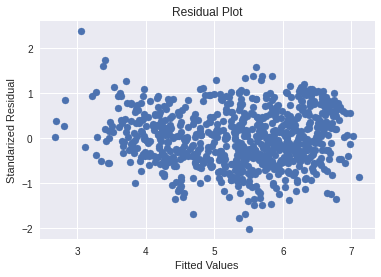

In [13]:
residual = y - lin_reg_gdp_h.predict(X)

plt.scatter(lin_reg_gdp_h.predict(X), residual)
plt.xlabel('Fitted Values')
plt.ylabel('Standarized Residual')
plt.title('Residual Plot')
plt.show()

From the residual plot, we see that the deviation between the predicted score and the actual score is mostly within 1. Considering that the happiness score range is from 0 to 7.77, we can conclude that our prediction is not necessarily significant.

Since the residual plot shows a curve, a linear model may not be the most appropriate model to predict the happiness score from GDP per capita, healthy life expectancy, and social support.

To further assess our model with GDP per capita, healthy life expectancy, and social support we fit a logistic regression. In this model, we predict whether a country will be ranked higher than 10 based on the three independent variable.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
y = all_years['above_10']
X = all_years[['GDP per capita', 'Healthy life expectancy', 'Social support']]

# split data into train data and test data to measure the significance
# of model using the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# fit model
logistic_model = LogisticRegression().fit(X_train, y_train)

In [16]:
# get accuracy score
predict = logistic_model.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, predict), 4))

Accuracy score: 0.9447


From the logistic model we were able to predict whether a country will be ranked higher than 10 with 94.47% accuracy using GDP per capita, healthy life expectancy, and social support as a independent variable.

# Evaluation of Significance

In [17]:
import statsmodels.api as sm
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


From the analysis above we can created the following models:

* $Score = 1.2489GDP + 1.1372H + 0.8248SS + 2.6489$

$GDP = \text{GDP per capita} \\ H = \text{Health life expectancy} \\
SS = \text{Social support}$

We conduct hypothesis testing on the slopes of the model to see if the independent variables are statistically significant. We set the significance level to 0.05.

For the multiple linear regression model, we conduct an F-test to see whether all the independent variables are significant.

$H_0: \beta_{H} = \beta_{GDP} = \beta_{SS} = 0 \\ H_A: \beta_{H} = \beta_{GDP} = \beta_{SS} \neq 0$

In [18]:
X = all_years[['GDP per capita', 'Healthy life expectancy', 'Social support']]
y = all_years['Score']
lin_reg_gdp_h = LinearRegression().fit(X, y)
predict_mean = lin_reg_gdp_h.predict(X).mean() # get predicted value

ssr = sum((lin_reg_gdp_h.predict(X) - predict_mean)**2) # get ssr
sse = sum((y - lin_reg_gdp_h.predict(X))**2) # get sse

msr = ssr / 3 # get mse
mse = sse / (len(y) - 3 - 1) # get mse
ts = msr/mse # get test statistics

p_value = stats.f.cdf(ts, 3, 779) # get p-value
print('p_value:', 1 - p_value)

p_value: 1.1102230246251565e-16


Since p-value is less than the significance level, we reject the null hypothesis and conclude that at least one predictor explains a significant amount variation in the happiness score.

# Conclusion
To analyze the happiness dataset and trying to understand the relationship between various factors and the happiness score each country received, we asked three research questions: 

1. What trends can we see for countries that are ranked higher than 10 in terms of the other factors in the data?
2. Are there any relationships between the independent variable and the happiness score?
3. If so, how well can we predict actual values using the relationship we found for the first research question? 

We first began by using the KMeans clustering algorithm on the independent variables to see for potential trends that are relevant for countries that are ranked higher than 10. We found that countries with higher GDP per capita scores tend to have higher scores for social support and healthy life expectancy. However, we could not see any trend for freedom to make life choices, generosity, and perception of corruption. Countries with lower GDP per capita had similar scores for the three independent variables compared to the higher-ranked countries.

We then began by describing our data to interpret its distribution and found that the data seemed to be skewed to one side for each factor. Then, we found three factors that showed a linear trend: GDP per capita, Social Support, and Healthy life expectancy by examining the scatterplots. Unfortunately, $R^2$ values for all factors were not very close to 1 (all below 0.65), meaning that the data for each factor does not entirely explain the variation in the happiness score. Though there were a few factors such as GDP, H, and SS that showed a higher correlation to the overall happiness score, it was not a perfect indicator that there was a strong linear relationship. We further tested the mean squared error and noticed that GDP, H, and SS had lower values compared to the other.

We then decided to fit a linear regression model on happiness scores against GDP, H, and SS to find how well the model can predict the happiness score. The F-test shows that at least one independent variable is significant in the multiple linear regression model. To analyze our model's accuracy, we plot a residual plot and found that most points deviated by 1 from the actual values. Considering that the score ranges between 0 to 10 and the interquartile range is around 1.6, we can not say that the model is significant. However, using a logistic regression model, we can predict whether a country is ranked higher than 10 with 94.47% accuracy using the three independent variables.  

These findings can help inform public health officials/government officials about which area in policy will most likely positively influence a nation's overall happiness score. This way, nations leaders can make more holistic decisions with these results in mind. Nations need to strive to create a happier environment for citizens to live in--with findings on the correlation between these factors and overall happiness score, leaders can better gauge how their decisions are affecting/not affecting different parts of people's lives.

# Source Code
https://github.com/ksyselena1/world-happiness-analysis